## SNS (Simple Notification Service):
- Send one message to many receivers
- The "event producer" only send messages to one SNS topic
- As many as we want "event receivers" (subscribers) will listen to SNS topic notifications
- Each subscriber to the SNS topic will receive the messages (note: new feature to filter messages)
- Up to 12,500,000 subscription per SNS topic
- 100,000 topics limit

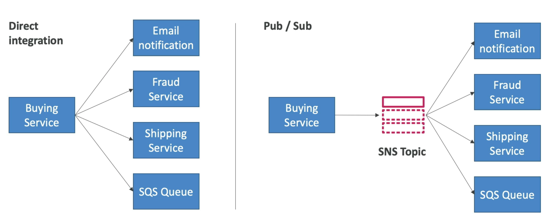

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('sns.jpeg')
new_image = img.resize((550, 220))
display(new_image)

##### Subscribers for SNS notification:

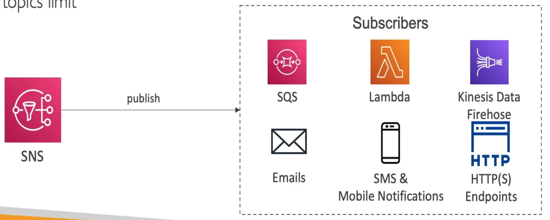

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('sns1.jpeg')
new_image = img.resize((550, 220))
display(new_image)

##### Services that send data to SNS for Notification:

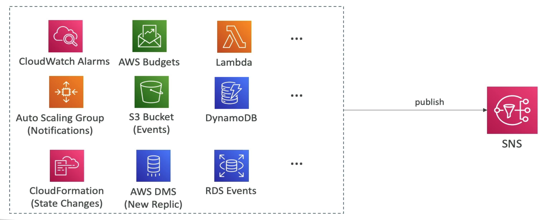

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('sns2.jpeg')
new_image = img.resize((550, 220))
display(new_image)

##### SNS Publish:

Topic Publish (using SDK):
- Create a topic
- Create a subscription
- Publish to the topic

Direct Publish (using SDK for Mobile Apps):
- Create Platform Application
- Create Platform endpoint
- Publish to Platform endpoint
- Works with Google GCM, Apple APNS, Amazon ADM

##### Amazon SNS Security:
Encryption:
- In-Flight: HTTPS API
- At Rest: KMS Keys
- Client Side encryption (if client want to perform encryption and decryption)

Access Controls:
- IAM policies to regulate access to SNS API
- SNS Access Policies:
    - Cross account access for SNS topics
    - Allowing other services (S3, etc,.) to write to an SNS topic

#### Setup SNS topic:
- Go to SNS console
- Create SNS topic
    - Name
    - Next
    - Type
        - FIFO (SQS only)
        - Standard (SQS, Lambda, HTTP, SMS, Email, Mobile Application Endpoints)
        - Name
        - Display Name (optional)
    - Encryption
    - Access Policy
    - Delivery Retry Policy
    - Delivery Status Logging
    - Tags
    - Create

#### Setup Subscribers to SNS topic:
- After creating the topic
- Go inside the created topic
- Click on the "Subscriptions" tab
    - Create Subscription
        - Topic ARN
        - Protocol
            - Email *
            - Email JSON
            - SMS
            - Kinesis Data Firehose
            - Lambda 
            - SQS
            - HTTP
            - HTTPS
        - Endpoint
        - Create

#### SNS + SQS => Fan Out:
- Push once in SNS, receive in all SQS queues that are subscribers
- Fully decoupled, no data loss
- SQS allows for data persistence, delayed processing, retries of work
- Ability to add more subscribers (more SQS queues over time)
- Make sure SQS Access Policy has the permissions for SNS write
- Cross Region Delivery: works with SQS in another region as well

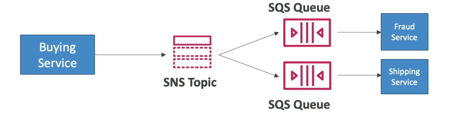

In [11]:
from PIL import Image 
from IPython.display import display

img = Image.open('fanout.jpeg')
new_image = img.resize((450, 120))
display(new_image)

##### Application - S3 Events to multiple Queues: 
- Event type: S3 object create
- Prefix: Images/
- Then, we can have only one S3 Event rule
- But, if we want to send to multiple Queues used Fan Out

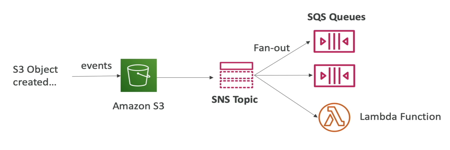

In [14]:
from PIL import Image 
from IPython.display import display

img = Image.open('multipleevents.jpeg')
new_image = img.resize((450, 150))
display(new_image)

##### Application - SNS to Amazon S3 via Kinesis Data Firehose: 


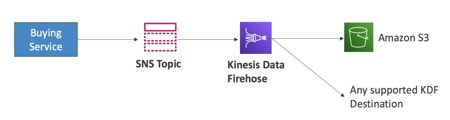

In [15]:
from PIL import Image 
from IPython.display import display

img = Image.open('kdf.jpeg')
new_image = img.resize((450, 120))
display(new_image)

##### SNS FIFO Topic:
- First in First Out
- Similar Features as SQS
    - Ordering by Message Group ID
    - De-duplication explicitly using ID or Content Hashing (SHA 256)
- Can have both SQS Standard & FIFO Queue as subscribers
- Limited throughput (same as SQS)

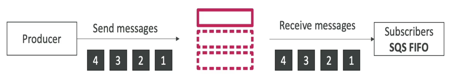

In [17]:
from PIL import Image 
from IPython.display import display

img = Image.open('SNSfifo.jpeg')
new_image = img.resize((450, 80))
display(new_image)

##### SNS FIFO + SQS FIFO => Fan Out:
- In case we needs Fan Out + Ordering + De-duplication

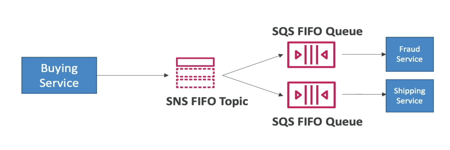

In [19]:
from PIL import Image 
from IPython.display import display

img = Image.open('FIFOfanout.jpeg')
new_image = img.resize((450, 150))
display(new_image)

##### SNS - Message Filtering:
- JSON Policy for filtering messages sent to SNS topic's subscription
- If subscription doesn't have filter policy the it receives all the messages

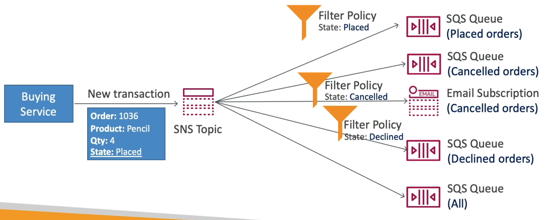

In [22]:
from PIL import Image 
from IPython.display import display

img = Image.open('filtering.jpeg')
new_image = img.resize((550, 220))
display(new_image)